# **Instrucciones para examen**

**Objetivo:** Este examen tiene como objetivo evaluar la capacidad del estudiante para limpiar, explorar, implementar y evaluar modelos de clasificación en un dataset real. Utilizaremos el «Wine Quality Dataset» disponible en [UCI Machine Learning Repository.](https://archive.ics.uci.edu/dataset/186/wine+quality) Los estudiantes deben demostrar habilidades prácticas en la manipulación de datos, creación de visualizaciones y modelado predictivo, así como una comprensión de las consideraciones éticas y tecnológicas en el análisis de datos.

**Contexto y Descripción del Dataset**

El «Wine Quality Dataset» contiene datos sobre las características químicas y físicas de diferentes muestras de vino tinto y blanco, así como su calidad, evaluada por expertos en una escala de 0 a 10. Este dataset es ampliamente utilizado en la investigación de modelos de clasificación y regresión debido a su naturaleza multifacética y su aplicación en la industria vinícola.

**Diccionario de Datos:**

1.  **fixed acidity:** Acidez fija en g/dm³.
2.  **volatile acidity:** Acidez volátil en g/dm³.
3.  **citric acid:** Ácido cítrico en g/dm³.
4.  **residual sugar:** Azúcar residual en g/dm³.
5.  **chlorides:** Cloruros en g/dm³.
6.  **free sulfur dioxide:** Dióxido de azufre libre en mg/dm³.
7.  **total sulfur dioxide:** Dióxido de azufre total en mg/dm³.
8.  **density:** Densidad en g/cm³.
9.  **pH:** Nivel de pH.
10. **sulphates:** Sulfatos en g/dm³.
11. **alcohol:** Porcentaje de alcohol en % vol.
12. **quality:** Calidad del vino (variable objetivo, escala de 0 a 10).

**Requisitos**

1.  **Limpieza de Datos:**
* **Identificación y eliminación de valores duplicados:** Asegúrate de que no haya registros duplicados que puedan sesgar los resultados del análisis.
* **Verificación y ajuste de tipos de datos:** Verifica que cada columna tenga el tipo de dato correcto (numérico o categórico) y ajusta si es necesario.
* **Corrección de inconsistencias en valores categóricos:** Revisa las categorías de las variables y unifica aquellos valores que puedan estar escritos de diferentes maneras pero que representen lo mismo.
* **Manejo de valores faltantes adecuadamente:** Identifica y maneja los valores faltantes utilizando técnicas apropiadas como la imputación de la mediana, media o moda, según corresponda.
2.  **Exploración de Datos:**
* **Visualizaciones univariadas y multivariadas:** Crea histogramas, gráficos de barras, diagramas de dispersión y mapas de calor para entender la distribución y las relaciones entre las variables.
* **Estadísticas descriptivas:** Calcula medidas de tendencia central (media, mediana, moda) y de dispersión (rango, desviación estándar) para cada característica del dataset.
3.  **Implementación de Modelos:**
* **Modelos de Clasificación:** Implementa modelos de Logistic Regression y K-Nearest Neighbors (KNN).
* **Evaluación de Modelos:** Evalúa los modelos utilizando métricas como accuracy, precision, recall, y F1-score.
* **Comparación de Rendimiento:** Compara los resultados de ambos modelos y discute cuál es el más adecuado para este dataset.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Primeras 5 filas del DataFrame:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   

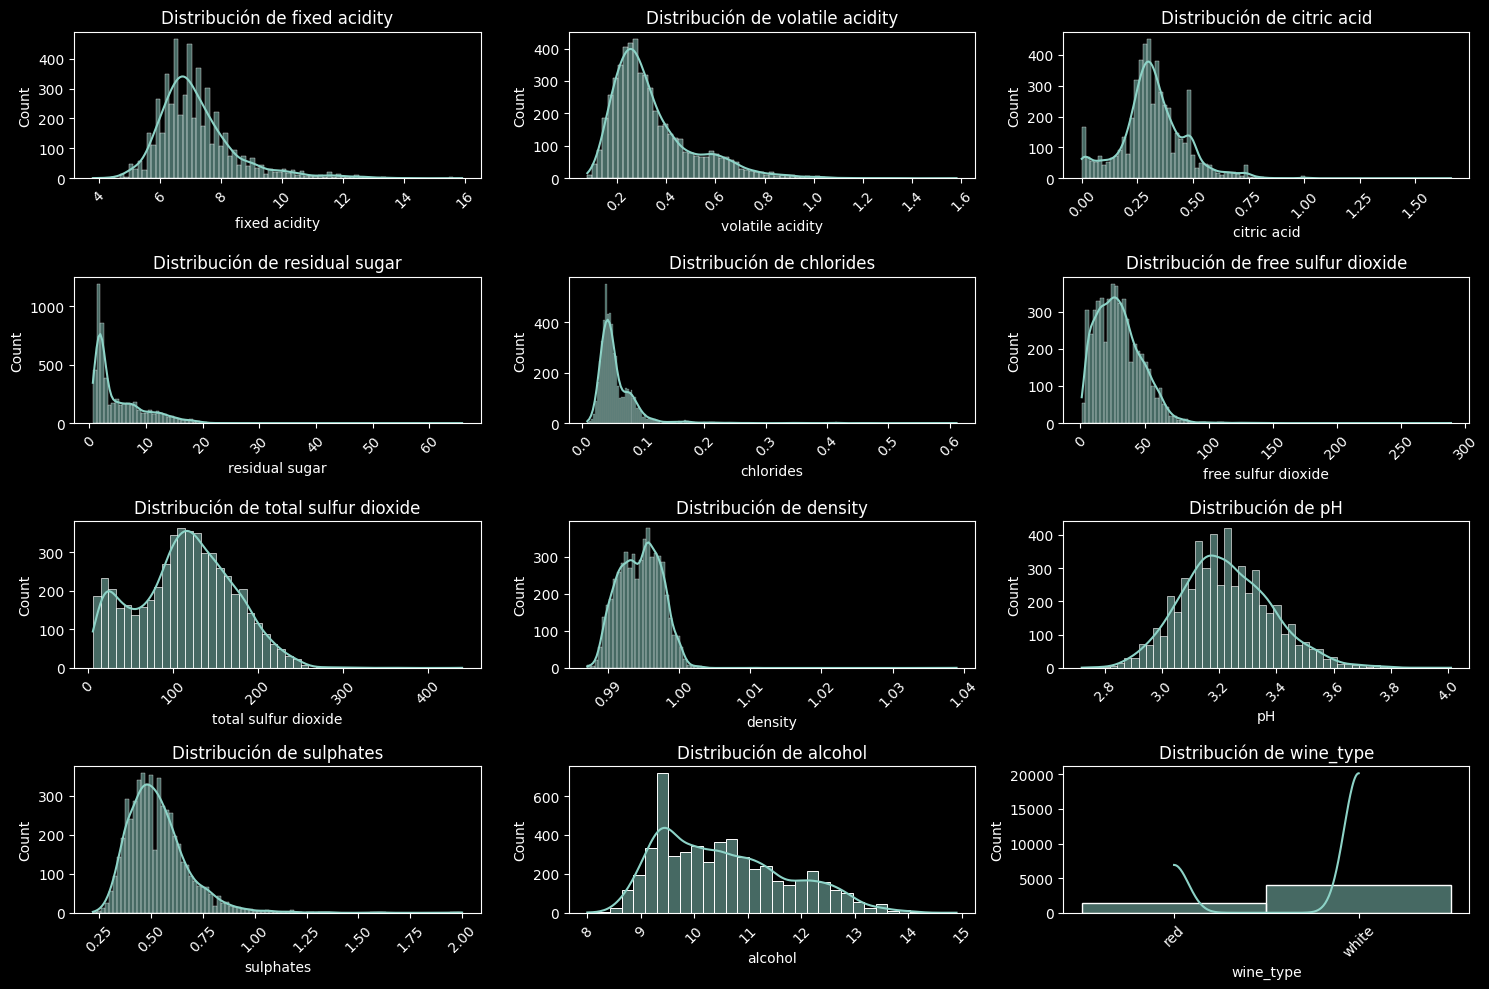

Información del dataset combinado:
<class 'pandas.core.frame.DataFrame'>
Index: 5320 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         5320 non-null   float64 
 1   volatile acidity      5320 non-null   float64 
 2   citric acid           5320 non-null   float64 
 3   residual sugar        5320 non-null   float64 
 4   chlorides             5320 non-null   float64 
 5   free sulfur dioxide   5320 non-null   float64 
 6   total sulfur dioxide  5320 non-null   float64 
 7   density               5320 non-null   float64 
 8   pH                    5320 non-null   float64 
 9   sulphates             5320 non-null   float64 
 10  alcohol               5320 non-null   float64 
 11  wine_type             5320 non-null   category
 12  quality               5320 non-null   int64   
dtypes: category(1), float64(11), int64(1)
memory usage: 545.6 KB
None

Estadística

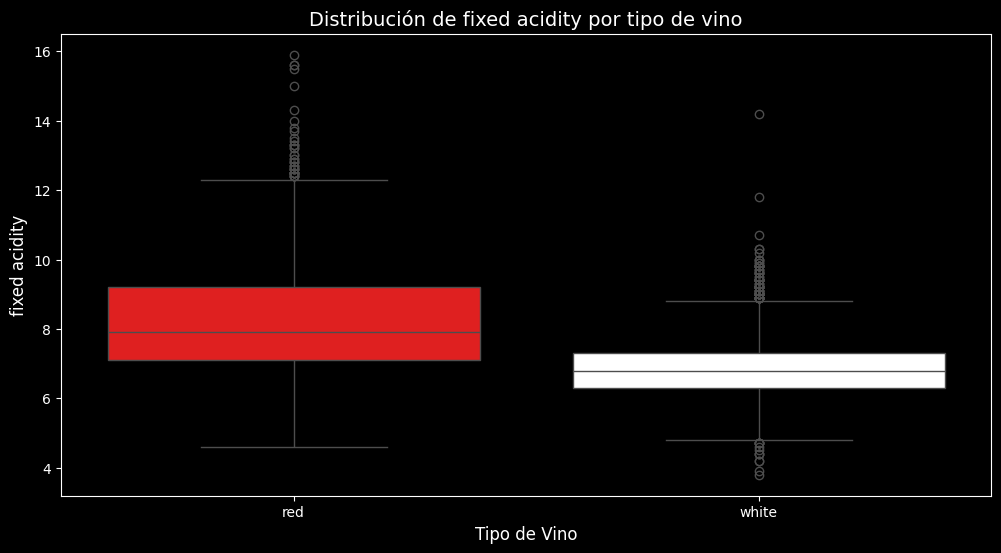

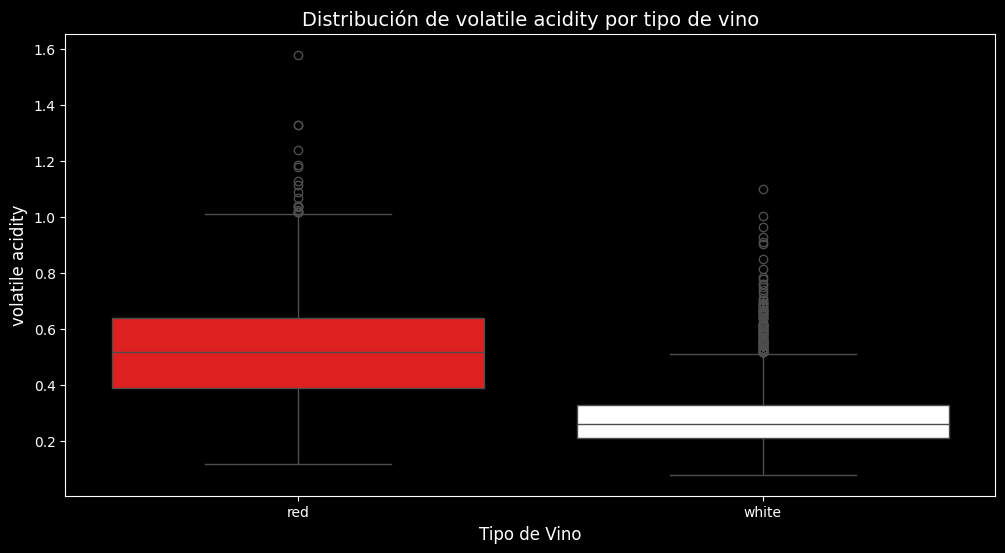

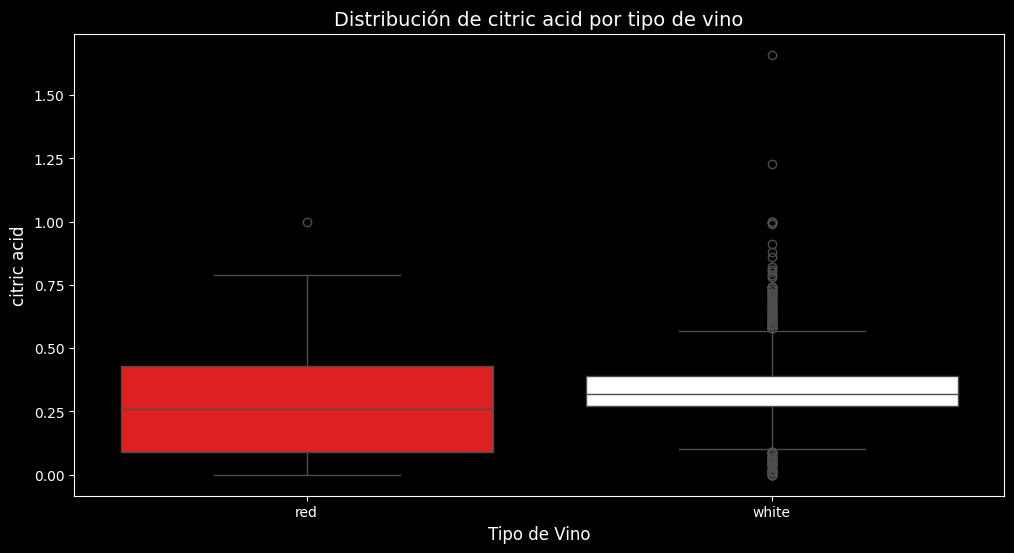

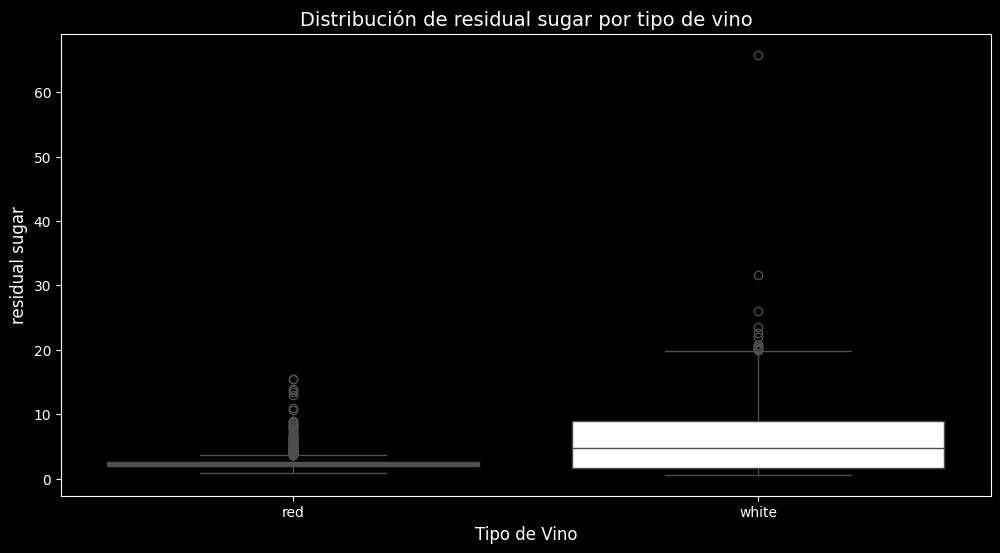

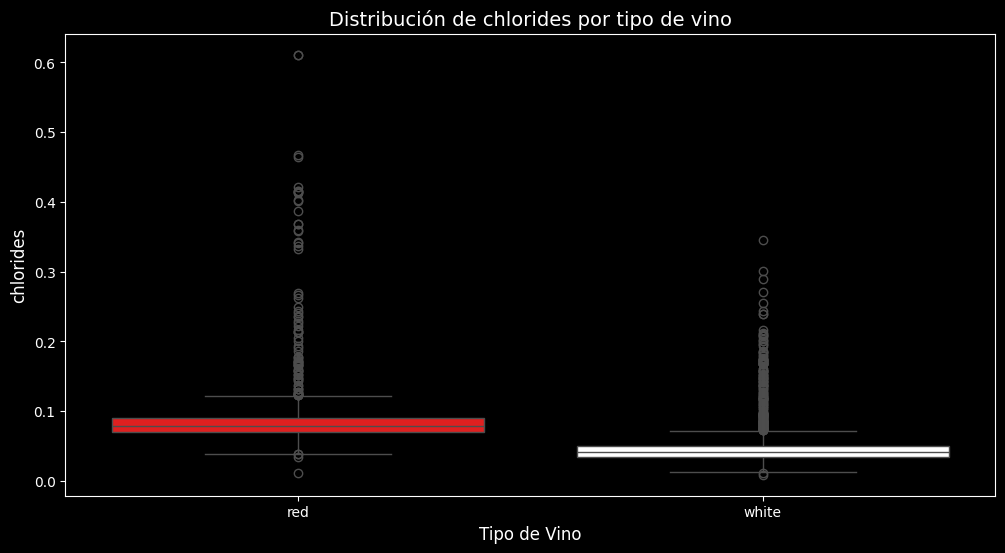

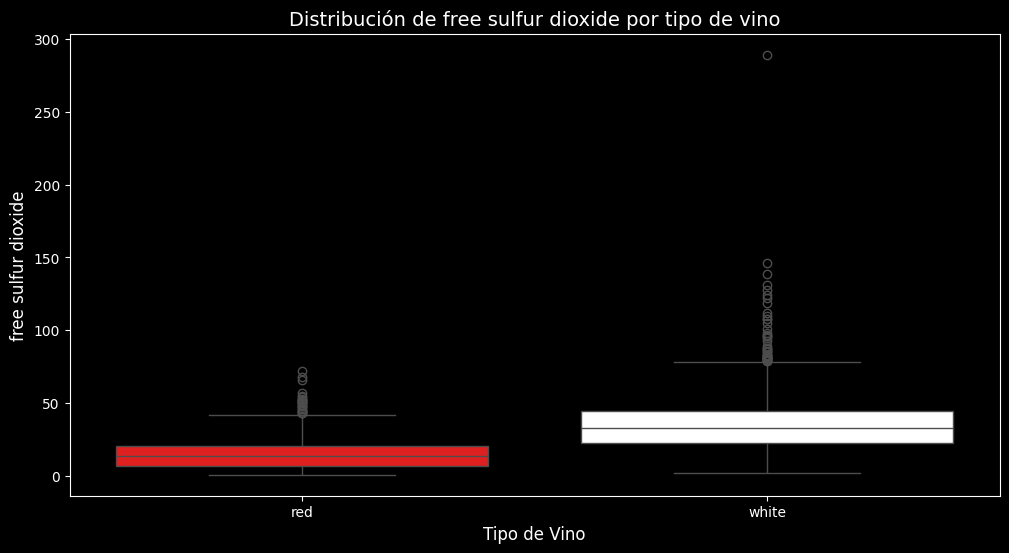

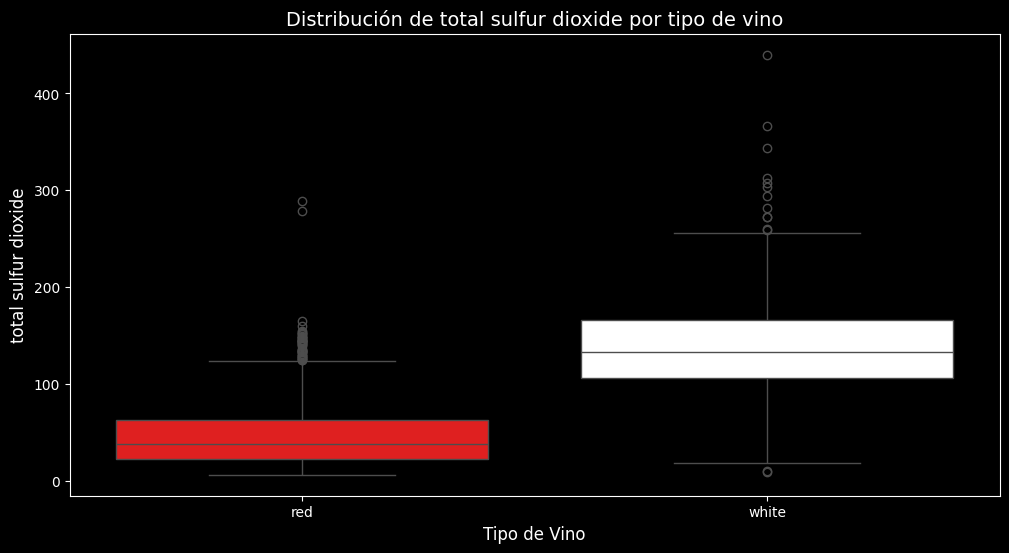

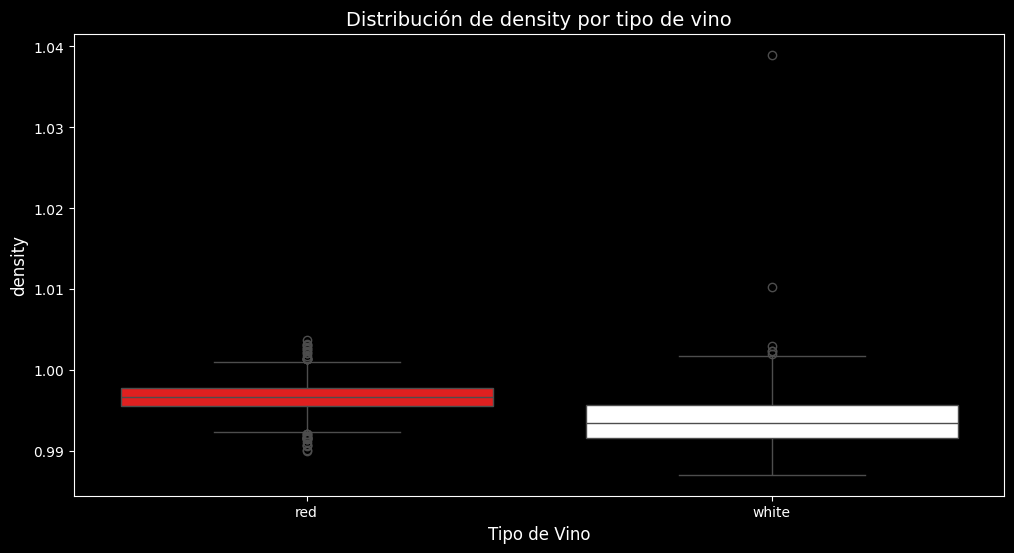

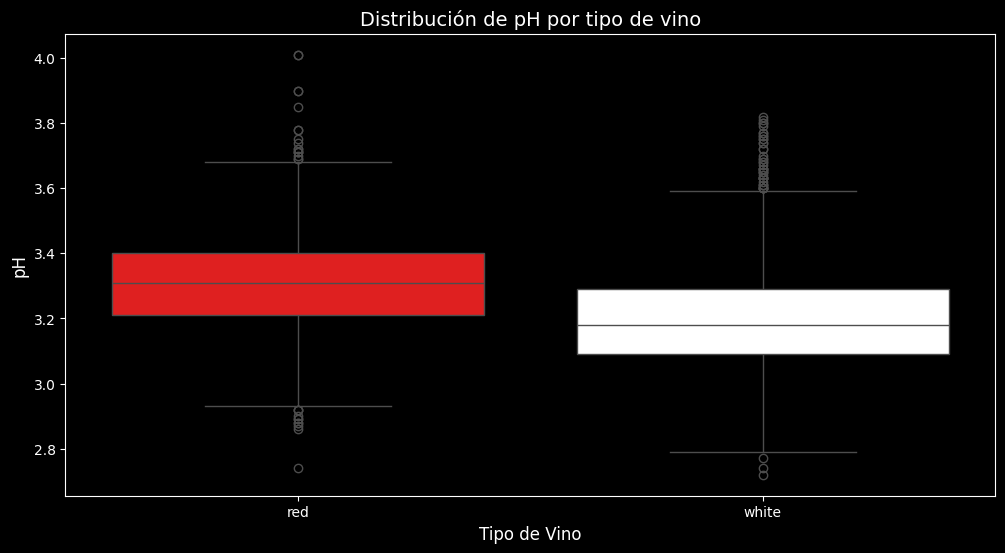

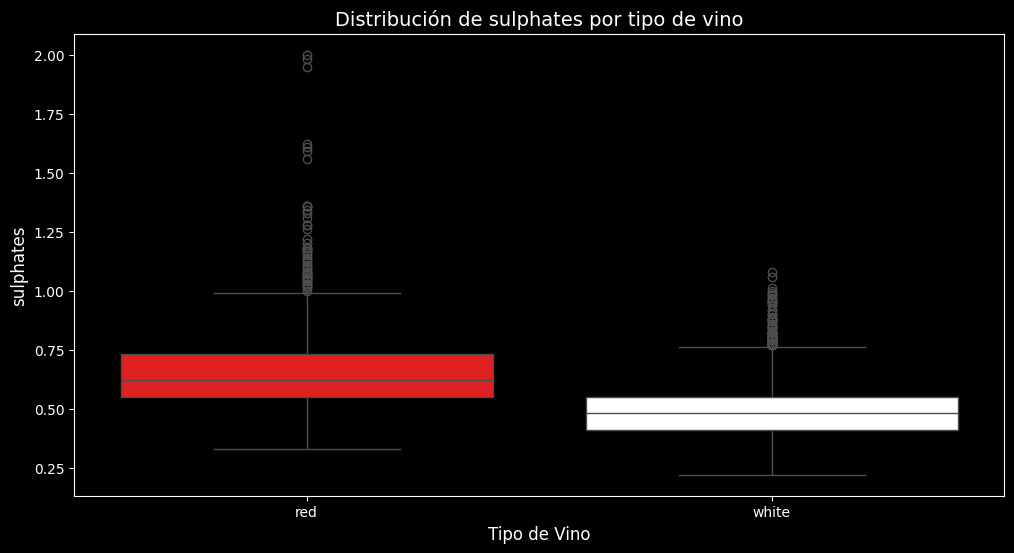

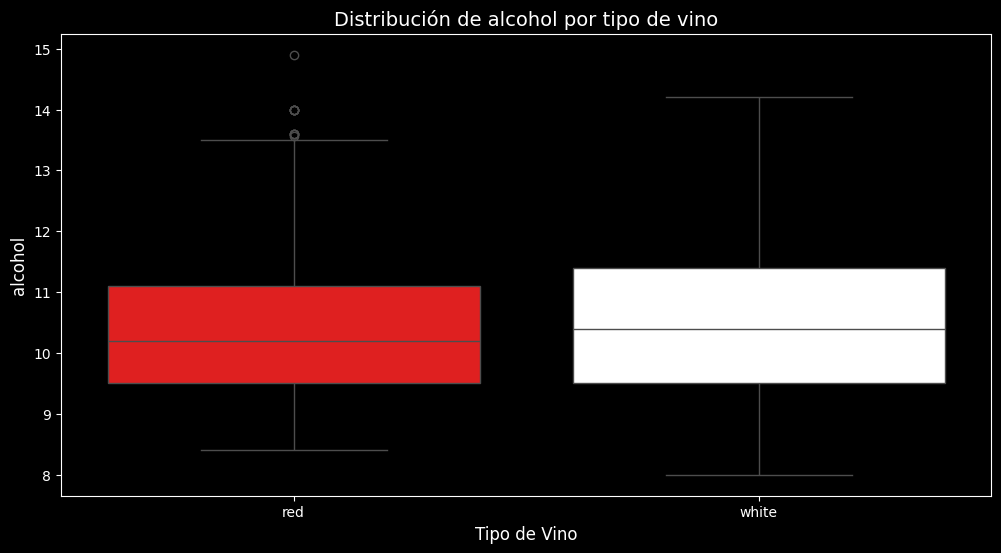


Visualizando distribución de calidad:


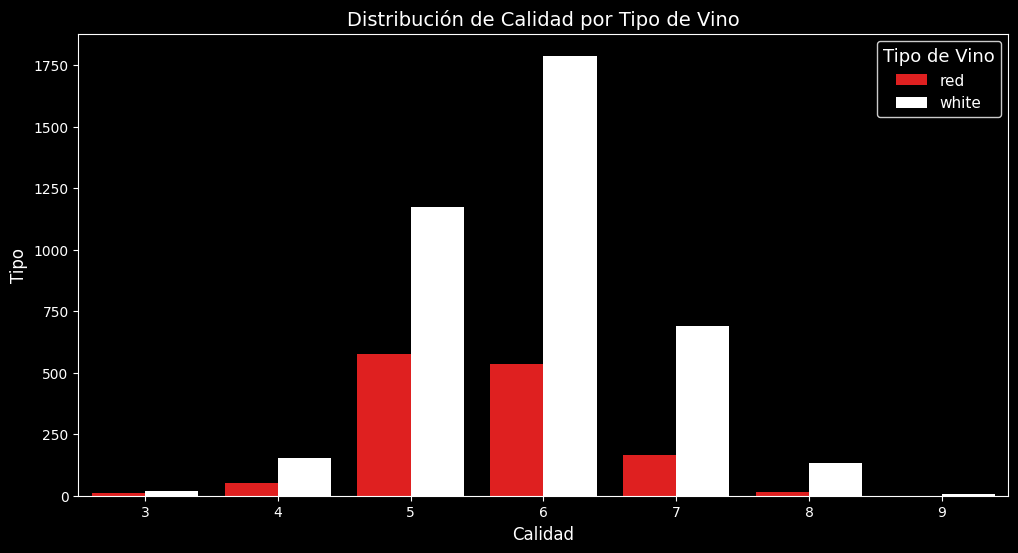


Comparando correlaciones:


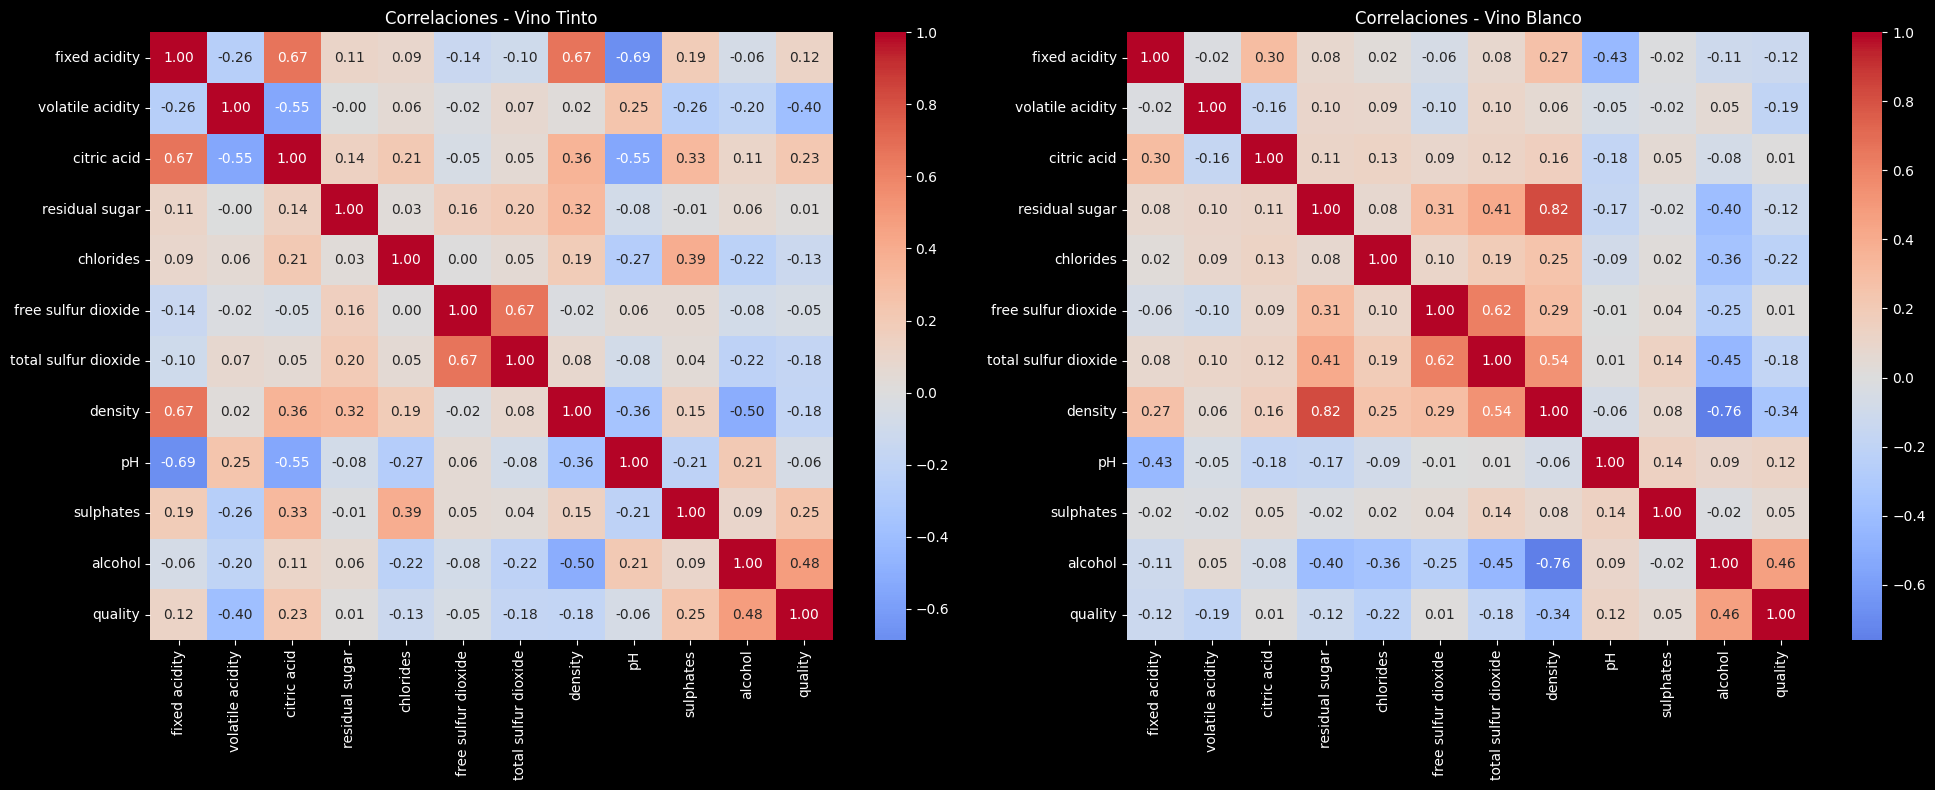


Entrenando modelos por tipo de vino:

Resultados para vino red:

LogisticRegression:
accuracy: 0.6066
precision: 0.5662
recall: 0.6066
f1: 0.5846

KNN:
accuracy: 0.5441
precision: 0.5122
recall: 0.5441
f1: 0.5265

Resultados para vino white:

LogisticRegression:
accuracy: 0.5208
precision: 0.4943
recall: 0.5208
f1: 0.4903

KNN:
accuracy: 0.4931
precision: 0.4671
recall: 0.4931
f1: 0.4744


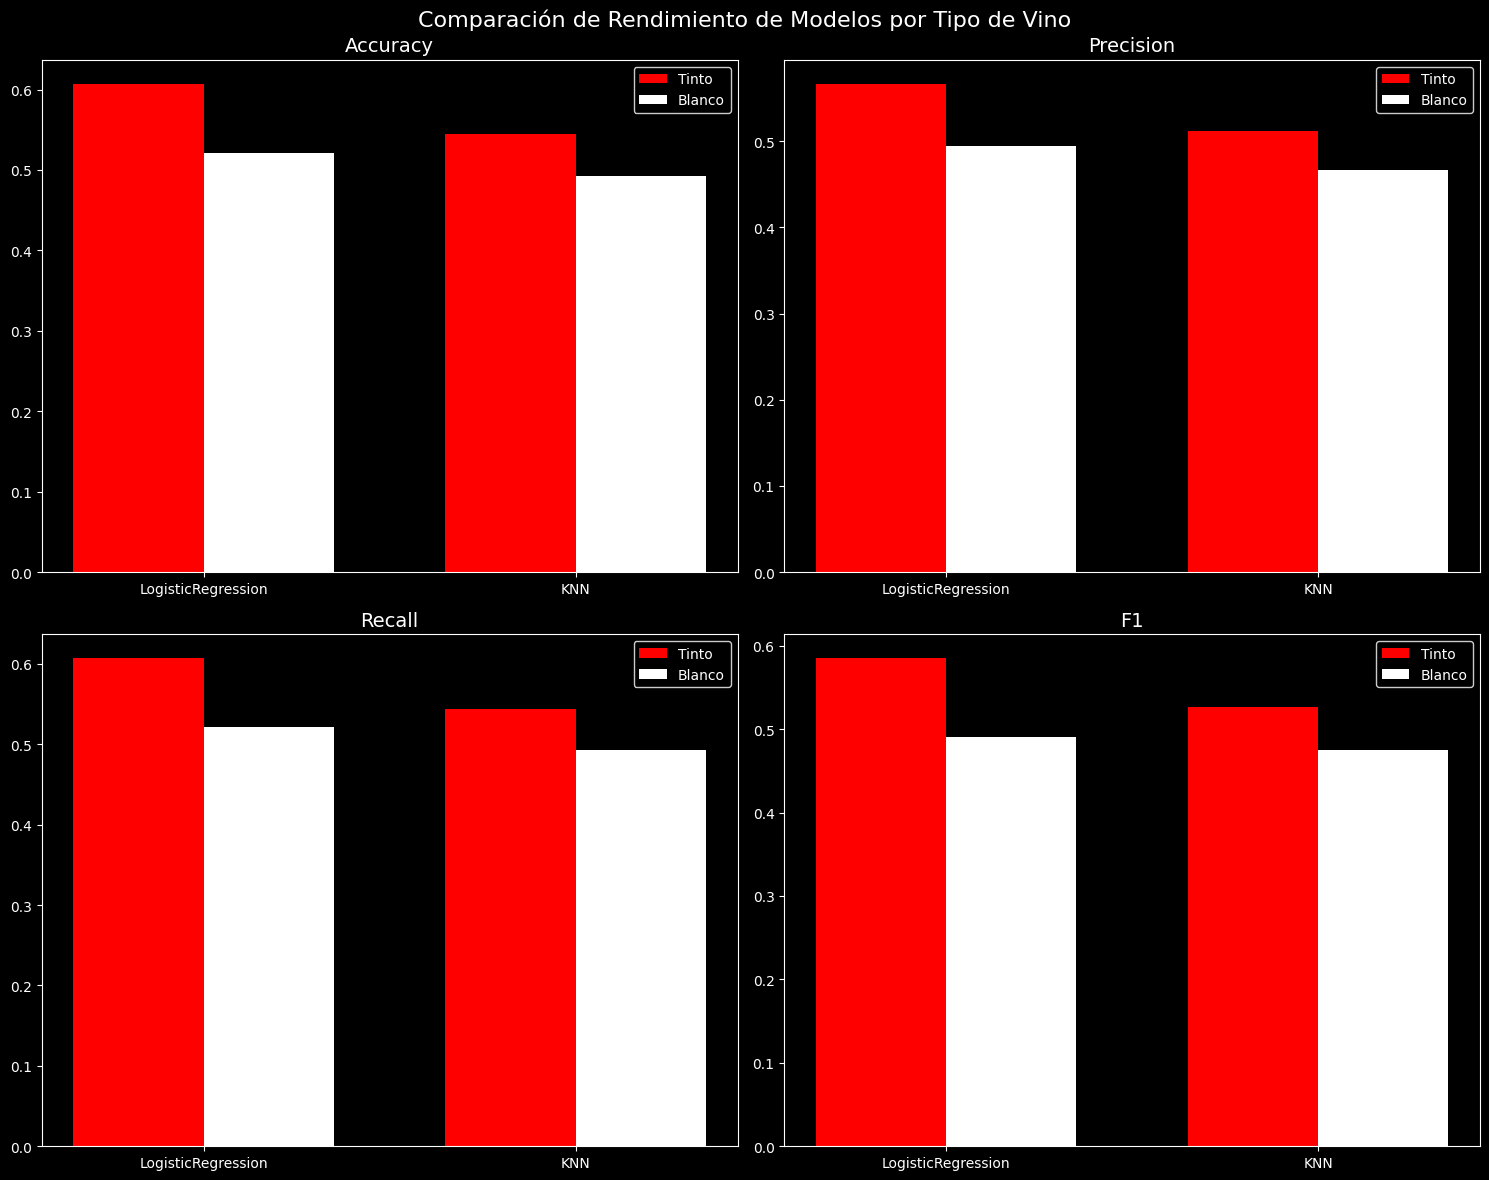


MODELO MÁS ADECUADO
Para Vino Tinto: Logistic Regression (Claramente superior)
Para Vino Blanco: Logistic Regression (Rendimiento ligeramente mejor)
Mejor Modelo: Logistic Regression


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# 1. Limpieza de DATOS

# Importar los datasets
from google.colab import drive
drive.mount('/content/drive')

# Cargar dataset de vino tinto
wine_quality_red_path = "/content/drive/MyDrive/Bootcamp Coding Dojo/DataScience/Examenes/Archivos CSV/winequality-red.csv"
wine_quality_red = pd.read_csv(wine_quality_red_path, delimiter=';')
X_red = wine_quality_red.drop('quality', axis=1) # Columna 'quality' de referencía
y_red = wine_quality_red['quality']

# Cargar dataset de vino blanco
wine_quality_white_path = "/content/drive/MyDrive/Bootcamp Coding Dojo/DataScience/Examenes/Archivos CSV/winequality-white.csv"
wine_quality_white = pd.read_csv(wine_quality_white_path, delimiter=';')
X_white = wine_quality_white.drop('quality', axis=1) # Columna 'quality' de referencía
y_white = wine_quality_white['quality']

# Agregar columna de tipo de vino
X_red['wine_type'] = 'red'
X_white['wine_type'] = 'white'

# Concatenar los datasets
X_combined = pd.concat([X_red, X_white], axis=0)
y_combined = pd.concat([y_red, y_white], axis=0)
df = pd.concat([X_combined, y_combined], axis=1)

# Primeros Datos
print("\nPrimeras 5 filas del DataFrame:")
print(df.head())

# Ultimos Datos
print("\nUltimas 5 filas del DataFrame:")
print(df.tail())

# 1.1 Identificación y eliminación de Datos duplicados
n_duplicados = df.duplicated().sum()
print(f"Número de duplicados: {n_duplicados}")
df = df.drop_duplicates()
print(f"Dimensiones del dataset después de eliminar duplicados: {df.shape}")

# 1.2 Verificación y corrección de valores categóricos
df['wine_type'] = pd.Categorical(df['wine_type'])
# Convertir wine_type a variable categórica
print("\nTipos de datos:")
print(df.dtypes)

# 1.3 Verificación de valores faltantes
valores_faltantes = df.isnull().sum()
print("\nValores faltantes por columna:")
print(valores_faltantes)

# 1.4 Imputación de valores faltantes numéricos con la mediana
if valores_faltantes.sum() > 0:
    print("\nImputando la mediana a los valores faltantes:")

    df = df.fillna(df.median())
else:
    print("\nNo hay valores faltantes en el dataset.")

# Estadísticas descriptivas básicas
print("\nEstadísticas descriptivas del dataset:")
print(df.describe())
print(df.info())

# 2. Exploración de DATOS

# 2.1 Visualizaciones univariadas y multivariadas
plt.figure(figsize=(15, 10))
for i, columna in enumerate(df.columns[:-1], 1):
    plt.subplot(4, 3, i)
    sns.histplot(data=df, x=columna, kde=True)
    plt.title(f'Distribución de {columna}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

def plot_distributions_by_type(df):
    """Distribución de características por tipo de Vino"""
    features = [col for col in df.columns if col not in ['wine_type', 'quality']]
    plt.style.use('dark_background') # Configuración del fondo negro
    custom_palette = {'red': 'red', 'white': 'white'}

    for feature in features:
        plt.figure(figsize=(12, 6))
        sns.boxplot(data=df, x='wine_type', y=feature, palette=custom_palette)
        plt.title(f'Distribución de {feature} por tipo de vino', fontsize=14, color='white')
        plt.xlabel('Tipo de Vino', fontsize=12, color='white')
        plt.ylabel(feature, fontsize=12, color='white')
        plt.xticks(fontsize=10, color='white')
        plt.yticks(fontsize=10, color='white')
        plt.show()

def plot_quality_distribution_by_type(df):
    """Distribución de Calidad por tipo de Vino"""
    plt.figure(figsize=(12, 6))
    plt.style.use('dark_background')# Configuración del fondo negro
    custom_palette = {'red': 'red', 'white': 'white'} # Paleta de colores personalizada
    sns.countplot(data=df, x='quality', hue='wine_type', palette=custom_palette)
    plt.title('Distribución de Calidad por Tipo de Vino', fontsize=14, color='white')
    plt.xlabel('Calidad', fontsize=12, color='white')
    plt.ylabel('Tipo', fontsize=12, color='white')
    plt.xticks(fontsize=10, color='white')
    plt.yticks(fontsize=10, color='white')
    plt.legend(title='Tipo de Vino', title_fontsize='13', fontsize='11', facecolor='black', edgecolor='white')
    plt.show()

def compare_correlations_by_type(df):
    """Matrices de correlación para cada tipo de Vino"""
    features = [col for col in df.columns if col not in ['wine_type']]

    # Separar por tipo de vino
    df_red = df[df['wine_type'] == 'red'][features]
    df_white = df[df['wine_type'] == 'white'][features]

    # Calcular correlaciones
    corr_red = df_red.corr()
    corr_white = df_white.corr()

    # Visualizar
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

    sns.heatmap(corr_red, annot=True, cmap='coolwarm', center=0, fmt='.2f', ax=ax1)
    ax1.set_title('Correlaciones - Vino Tinto')

    sns.heatmap(corr_white, annot=True, cmap='coolwarm', center=0, fmt='.2f', ax=ax2)
    ax2.set_title('Correlaciones - Vino Blanco')

    plt.tight_layout()
    plt.show()

# 2.1 Estatisticas descriptivas

def statistical_comparison(df):
    """Realiza una comparación estadística entre tipos de Vino"""
    features = [col for col in df.columns if col not in ['wine_type', 'quality']]

    stats_df = pd.DataFrame() #stats (estadisticas)

    for wine_type in ['red', 'white']:
        subset = df[df['wine_type'] == wine_type]
        stats = subset[features].describe()
        stats = stats.loc[['mean', 'std', 'min', 'max']].T
        stats.columns = [f'{wine_type}_wine_{col}' for col in stats.columns]

        # Concatenación de "stats" para cada tipo de Vino
        stats_df = pd.concat([stats_df, stats], axis=1)

    return stats_df

# 3. Implementación de Modelos

def train_models_by_type(df):
    """Entrenamiento de modelos por separados para cada tipo de Vino"""
    results = {}

    for wine_type in ['red', 'white']:
        # Filtrar por tipo de vino
        subset = df[df['wine_type'] == wine_type]

        # Preparar datos
        X = subset.drop(['wine_type', 'quality'], axis=1)
        y = subset['quality']

        # División train/test
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Escalar características
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # 3.1 Modelos de Clasificación (Logistic Regression y K-Nearest Neighbors (KNN)) y su Evaluación (3.2)
        models = {
            'LogisticRegression': LogisticRegression(max_iter=1000, multi_class='multinomial'),
            'KNN': KNeighborsClassifier(n_neighbors=5)
        }
        wine_results = {}
        for name, model in models.items():
            model.fit(X_train_scaled, y_train)
            y_pred = model.predict(X_test_scaled)

            results_dict = {
                'accuracy': accuracy_score(y_test, y_pred),
                'precision': precision_score(y_test, y_pred, average='weighted'),
                'recall': recall_score(y_test, y_pred, average='weighted'),
                'f1': f1_score(y_test, y_pred, average='weighted')
            }
            wine_results[name] = results_dict

        results[wine_type] = wine_results

    return results

# Resultados del analisis

print("Información del dataset combinado:")
print(df.info())

print("\nEstadísticas descriptivas por tipo de vino:")
print(statistical_comparison(df))

print("\nVisualizando distribuciones:")
plot_distributions_by_type(df)

print("\nVisualizando distribución de calidad:")
plot_quality_distribution_by_type(df)

print("\nComparando correlaciones:")
compare_correlations_by_type(df)

print("\nEntrenando modelos por tipo de vino:")
results = train_models_by_type(df)

# Mostrar resultados de los modelos
for wine_type, models in results.items():
    print(f"\nResultados para vino {wine_type}:")
    for model_name, metrics in models.items():
        print(f"\n{model_name}:")
        for metric, value in metrics.items():
            print(f"{metric}: {value:.4f}")

# 3.3 Comparación de Rendimiento

def plot_model_comparison(results):
    """Comparación de rendimiento de los modelos"""
    metrics = ['accuracy', 'precision', 'recall', 'f1']
    plt.style.use('dark_background') # Configuración del fondo negro
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Comparación de Rendimiento de Modelos por Tipo de Vino', fontsize=16, color='white')

    for idx, metric in enumerate(metrics):
        ax = axes[idx//2, idx%2]

        data = {
            'Vino Tinto': [results['red'][model][metric] for model in results['red']],
            'Vino Blanco': [results['white'][model][metric] for model in results['white']]
        }

        x = np.arange(len(results['red']))
        width = 0.35

        ax.bar(x - width/2, data['Vino Tinto'], width, label='Tinto', color='red')
        ax.bar(x + width/2, data['Vino Blanco'], width, label='Blanco', color='white')

        ax.set_title(f'{metric.capitalize()}', fontsize=14, color='white')
        ax.set_xticks(x)
        ax.set_xticklabels(results['red'].keys(), color='white')
        ax.legend(facecolor='black', edgecolor='white')

    plt.tight_layout()
    plt.show()

plot_model_comparison(results)

# Modelo más adecuado para el DATASET
print("\nMODELO MÁS ADECUADO")
print(f"Para Vino Tinto: Logistic Regression (Claramente superior)")
print(f"Para Vino Blanco: Logistic Regression (Rendimiento ligeramente mejor)")
print(f"Mejor Modelo: Logistic Regression")
